In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from luwiji.knn import illustration, demo

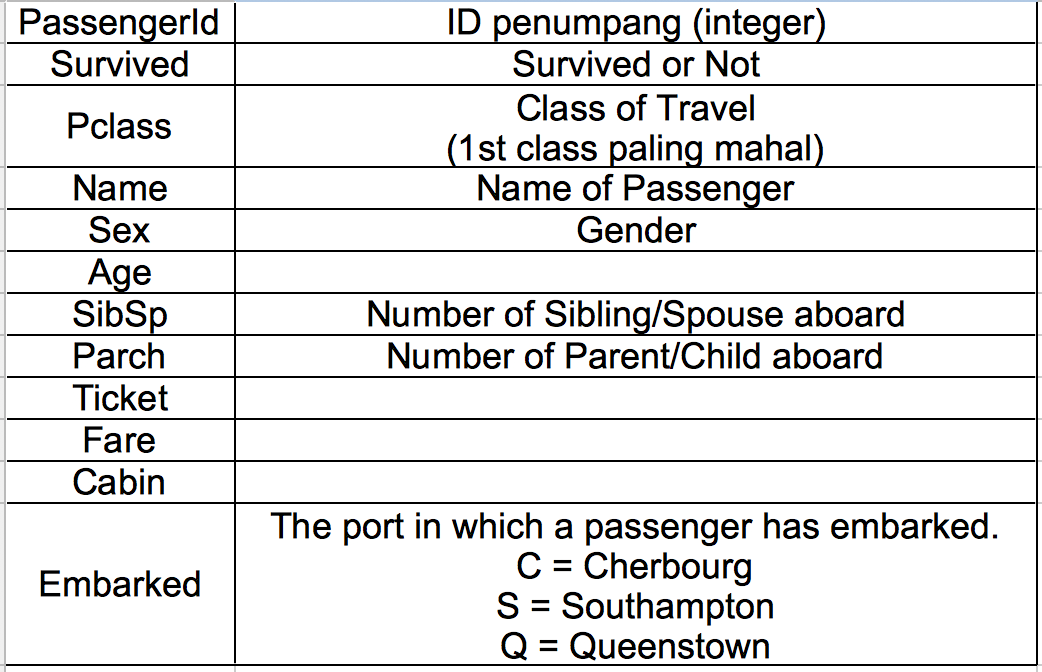

In [2]:
illustration.nomenklatur

In [3]:
df = pd.read_csv('dataset/titanicfull.csv')
df.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked  
0  29.00      0      0   24160  211.3375       B5        S  
1   0.92      1      2  113781  151.5500  C22 C26        S  
2   2.00      1      2  113781  151.5500  C22 C26        S  
3  30.00      1      2  113781  151.5500  C22 C26        S  
4  25.00      1      2  113781  151.5500  C22 C26        S

In [4]:
df.drop(columns=['name', 'ticket'], inplace=True)

- Quick EDA

In [5]:
from jcopml.plot import plot_missing_value

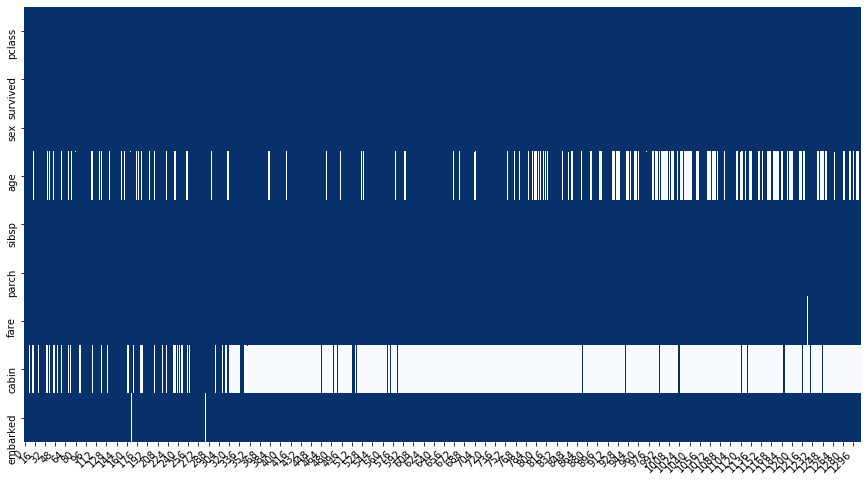

In [6]:
plot_missing_value(df)

In [7]:
df.drop(columns=['age', 'cabin'], inplace=True)

In [8]:
df.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [9]:
df.fillna({'embarked':'S'}, inplace=True)

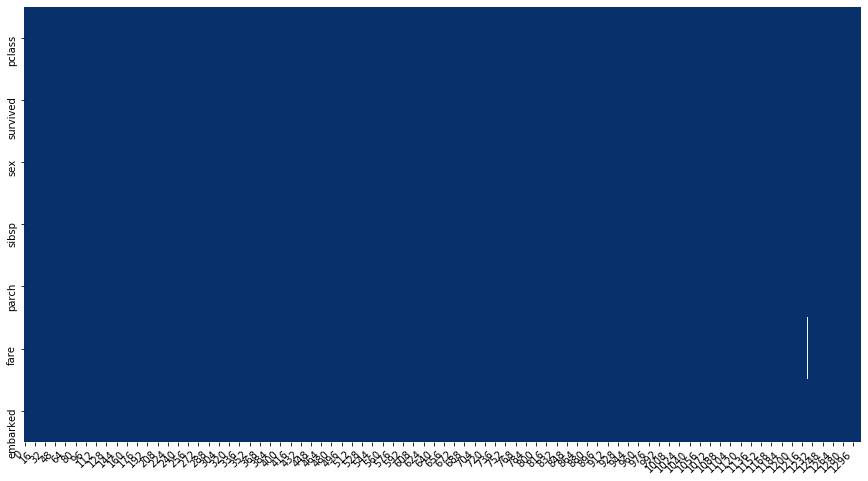

In [10]:
plot_missing_value(df)

In [11]:
df.fare.value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
13.7917     1
10.7083     1
7.7417      1
7.8208      1
34.6542     1
Name: fare, Length: 281, dtype: int64

In [12]:
df.fillna({'fare':'8.0500'}, inplace=True)

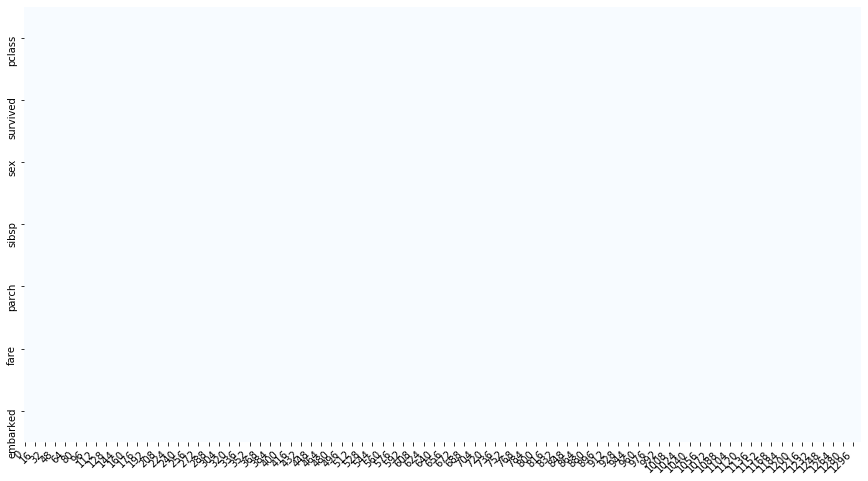

In [13]:
plot_missing_value(df)

- Persiapan data

In [14]:
df.head()

pclass  survived     sex  sibsp  parch     fare embarked
0       1         1  female      0      0  211.338        S
1       1         1    male      1      2   151.55        S
2       1         0  female      1      2   151.55        S
3       1         0    male      1      2   151.55        S
4       1         0  female      1      2   151.55        S

In [15]:
X = df.drop(columns='survived')
y = df.survived

X = pd.get_dummies(X, columns=['pclass', 'sex', 'embarked'])

- Intro Scikit-Learn

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
knn.score(X, y)

0.8701298701298701

- Concept 1: Dataset Splitting

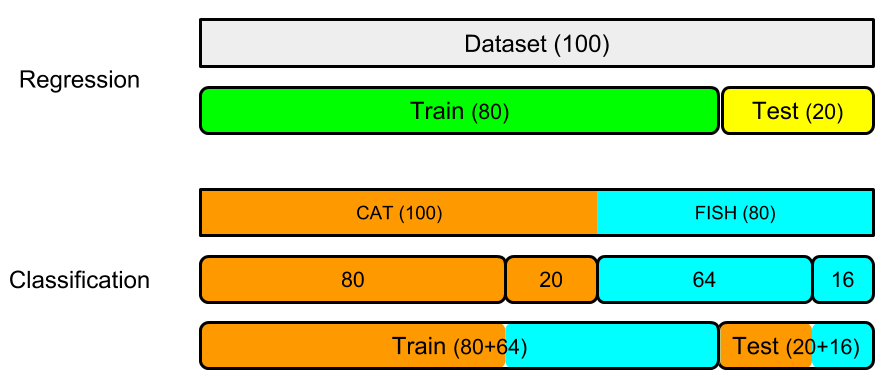

In [19]:
illustration.train_test_split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(columns='survived')
y = df.survived

X = pd.get_dummies(X, columns=['pclass', 'sex', 'embarked'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((916, 11), (393, 11), (916,), (393,))

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [23]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8799126637554585, 0.712468193384224)

- Concept 2: K-fold Cross Validation 

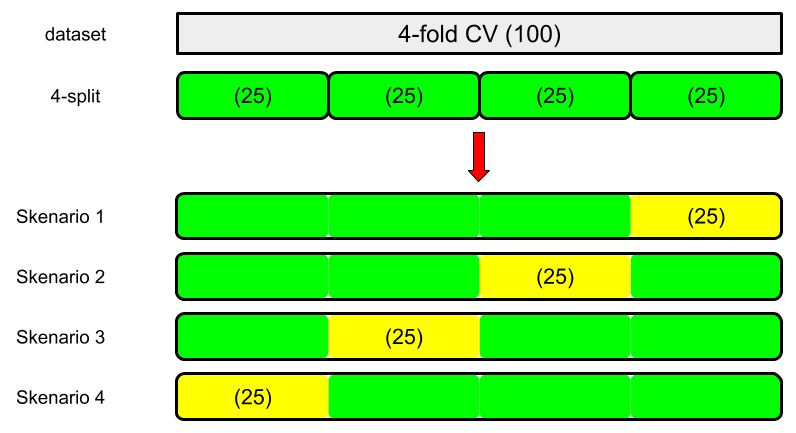

In [24]:
illustration.kfold_cv

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
cross_val_score(knn, X, y, cv=5)

array([0.51526718, 0.45038168, 0.61450382, 0.59923664, 0.66283525])

In [27]:
cross_val_score(knn, X, y, cv=5).mean()

0.5684449124038491

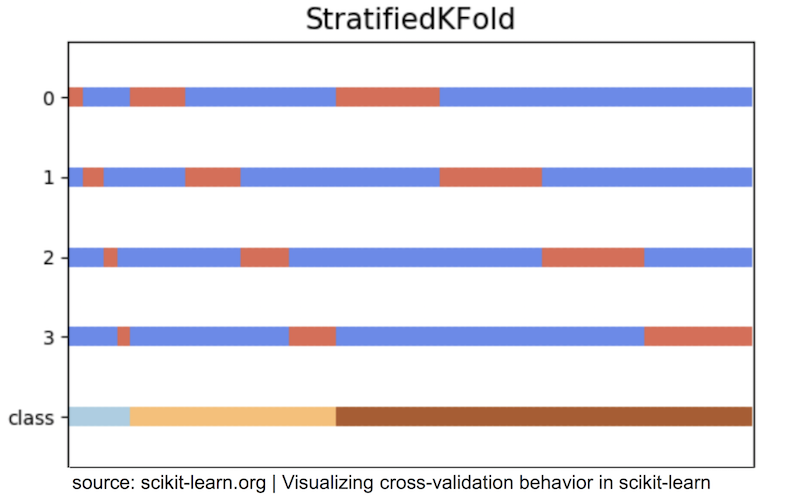

In [28]:
illustration.strat_kfold_cv

- 1. FEATURE ENGINEERING
- improvement melalui data : Fiature Scalling

- How to improve our model ?
- banyak sekali hal yang bisa kita coba untuk improve model kita. secara umum dapat dibagi menjadi 2:
   
    1. Improvement melalui data
        - Fiature Engineering
    2. Improvement melalui Model
        - tuning model yang sedang digunakan
        - menggunakan model berbeda

 - Improvement melalui data

    - pada dasarnya terdapat banyak sekali metode feature Engineering, dan sangat bergantung dengan kondisi datanya.
    - berikut beberapa contoh feature Engineering

    1. Feature Scalling
        - MinMax
        - Standard
        - Robust

    2. Feature Transformation
        - logaritmik
        - Pangkat
        - Trigonometrik

    3. Type Conversion 
        - categorical to numerical (encoding & hashing)
        - numerical to categorical (binning)

    4. Adding Feature
        - domain knowlege
        - feature crossing
        - feature summation or differencing

    5. Reducing feature
        - Dimensionality reduction
        - Feature importance and selection
        
    6. Text data
        - Flattening
        - Filtering
        - Chunking

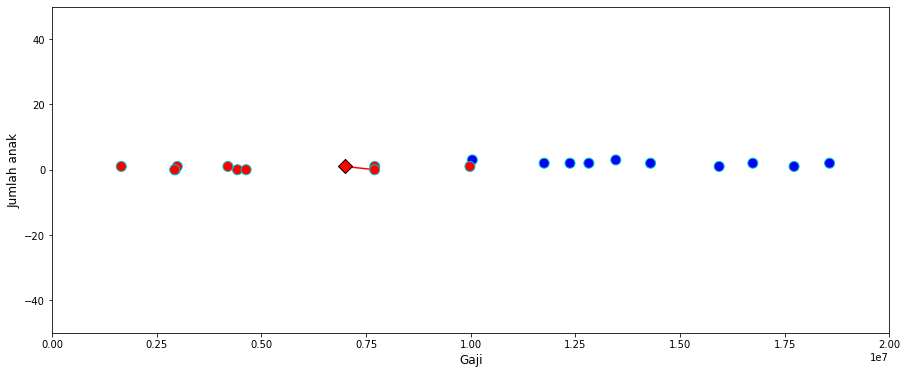

In [29]:
demo.knn_scaling()

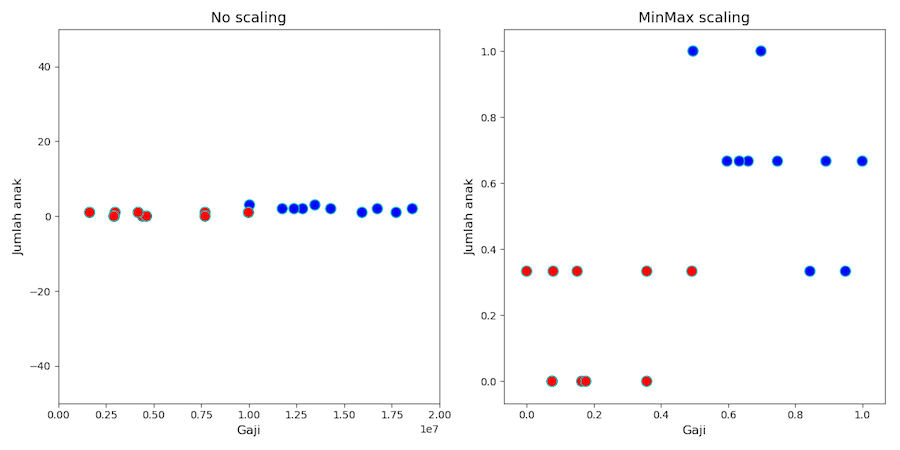

In [30]:
illustration.knn_scaling

- Improvement menggunakan feauture scalling

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [34]:
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.8995633187772926, 0.7786259541984732)

- Improvement melalui model : Parameter Tunning

- Tunning n_neighbor tanpa scalling

In [35]:
neighbor = range(1, 51, 2)
train_score = []
test_score = []

for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

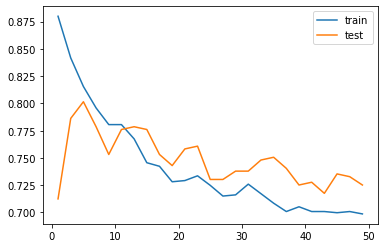

In [36]:
plt.plot(neighbor, train_score, label="train")
plt.plot(neighbor, test_score, label="test")
plt.legend()